# House price prediction using Tensorflow(EDA & Modelling)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
df = pd.read_csv(r'C:\Users\user\TF_2_Notebooks_and_Data\DATA\kc_house_data.csv')

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
#df.isnull().sum()
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


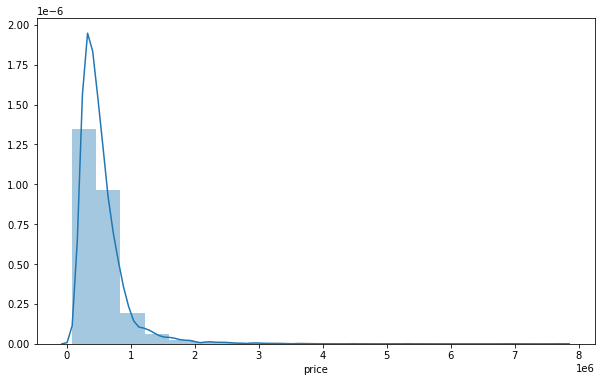

In [97]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'],bins = 20)

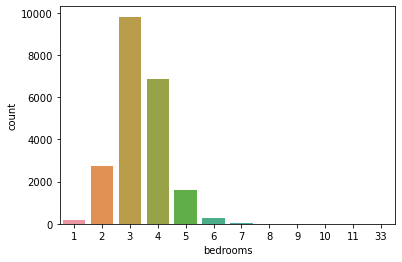

In [12]:
sns.countplot(df['bedrooms'])

In [17]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

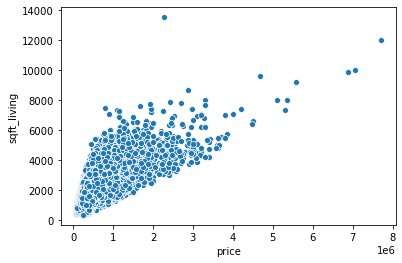

In [15]:
sns.scatterplot(x = 'price',y= 'sqft_living',data = df)

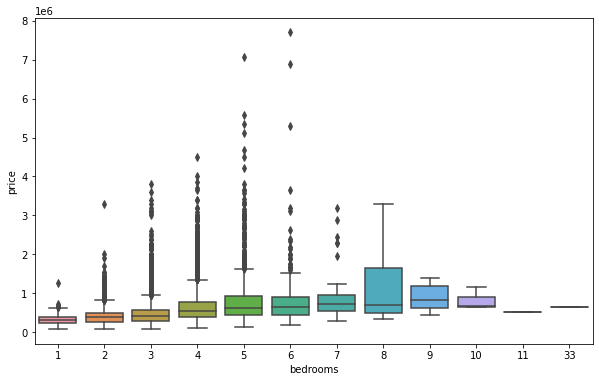

In [20]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'bedrooms',y = 'price',data = df)

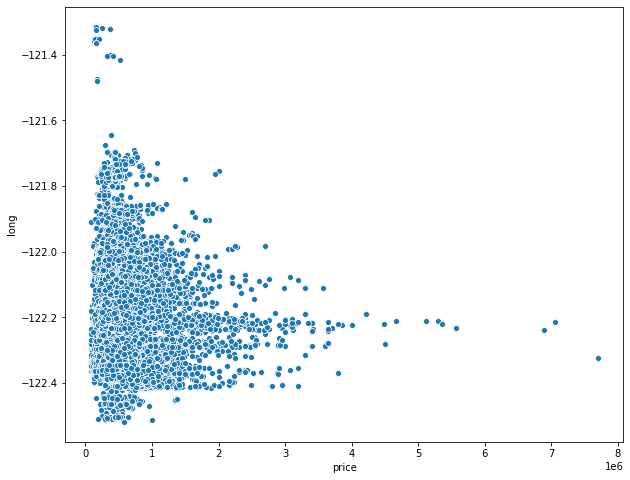

In [21]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'price',y = 'long',data = df)

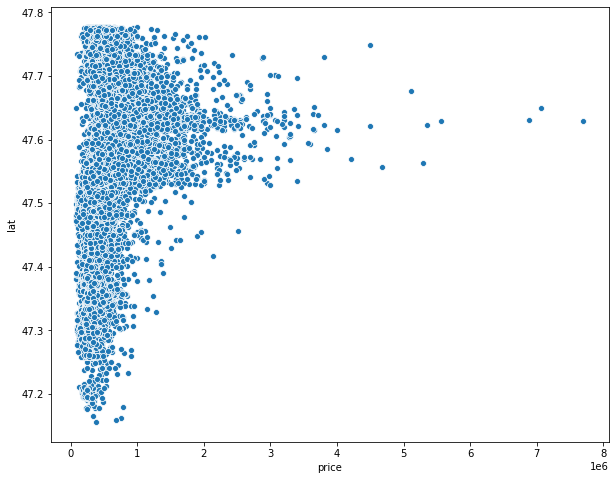

In [23]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'price',y = 'lat',data = df)

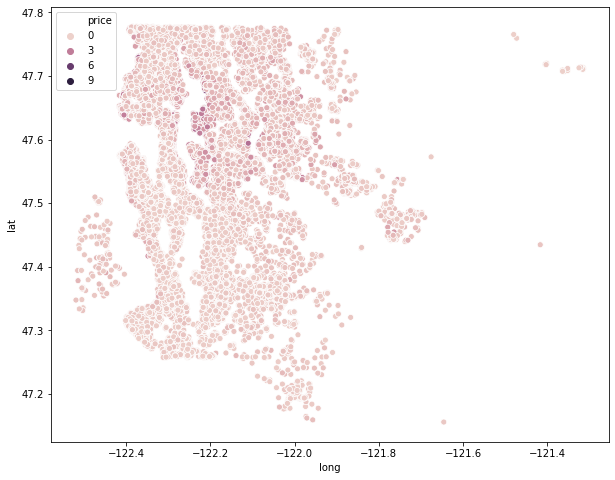

In [25]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'long',y = 'lat',data = df,hue = 'price')

In [99]:
df.sort_values('price',ascending = False).head(20)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
7245,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,47.6298,-122.323,3940,8800,2014,10
3910,7060000.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,47.6500,-122.214,3930,25449,2014,6
9245,6890000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,47.6305,-122.240,4540,42730,2014,9
4407,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,47.6289,-122.233,3560,24345,2014,8
1446,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,47.6232,-122.220,4600,21750,2015,4
1313,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,47.5631,-122.210,4320,24619,2015,4
1162,5110000.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,47.6767,-122.211,3430,26788,2014,10
8085,4670000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,47.5570,-122.210,3270,10454,2014,6
2624,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,47.7493,-122.280,3030,23408,2014,8
8629,4490000.0,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,47.6208,-122.219,3720,14592,2014,6


In [30]:
bottom_99_per = df.sort_values('price',ascending = False).iloc[216:]

In [31]:
bottom_99_per.shape

(21381, 21)

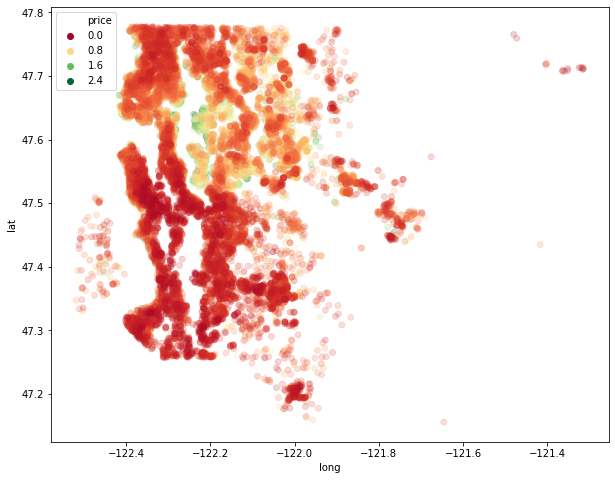

In [39]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'long',y = 'lat',data = bottom_99_per,hue = 'price',edgecolor = None,alpha = 0.2,palette = 'RdYlGn')

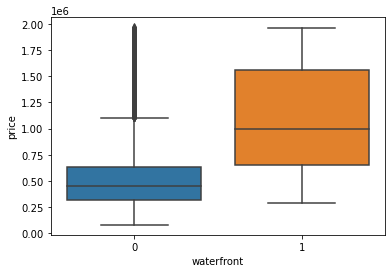

In [40]:
sns.boxplot(x = 'waterfront',y = 'price',data= bottom_99_per)

In [44]:
df = df.drop(['id'],axis = 1)

In [45]:
df['date'] = pd.to_datetime(df['date'])

In [46]:
df['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [48]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [49]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


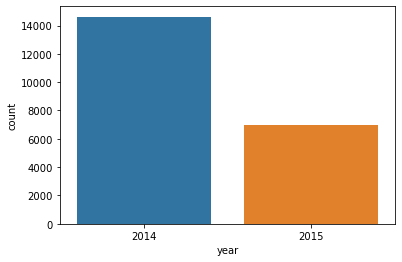

In [53]:
sns.countplot(x='year',data = df)

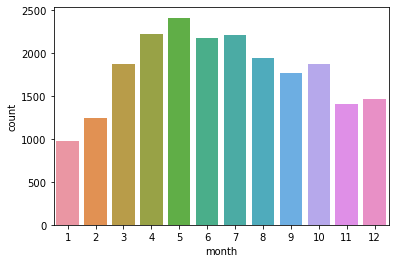

In [54]:
sns.countplot(x = 'month',data = df)

In [56]:
df = df.drop('date',axis = 1)

In [61]:
df = df.drop('zipcode',axis = 1)

In [62]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [65]:
len(df['sqft_basement'].unique())

306

In [67]:
x = df.drop('price',axis = 1).values
y = df['price'].values

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)


In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)



In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [76]:
model = Sequential()

model.add(Dense(19,activation = 'relu'))
model.add(Dense(19,activation = 'relu'))
model.add(Dense(19,activation = 'relu'))
model.add(Dense(19,activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mse')



In [77]:
model.fit(X_train,y_train,validation_data = (X_test,y_test),batch_size = 128,epochs = 400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 2s 158us/sample - loss: 430243600520.6959 - val_loss: 418942886515.0420
Epoch 2/400
15117/15117 [==============================] - 0s 24us/sample - loss: 429508412854.0637 - val_loss: 416493975617.7383
Epoch 3/400
15117/15117 [==============================] - 0s 22us/sample - loss: 418178335812.4834 - val_loss: 391330468274.8839
Epoch 4/400
15117/15117 [==============================] - ETA: 0s - loss: 363143569115.42 - 0s 22us/sample - loss: 357617020585.7861 - val_loss: 293528217514.0345
Epoch 5/400
15117/15117 [==============================] - 0s 22us/sample - loss: 216218141414.9538 - val_loss: 144653684827.0222
Epoch 6/400
15117/15117 [==============================] - 0s 24us/sample - loss: 111529041586.1856 - val_loss: 97701263941.5309
Epoch 7/400
15117/15117 [==============================] - 0s 24us/sample - loss: 97909020379.9124 - val_loss: 94888858661.9259
Epoch 8/4

Epoch 64/400
15117/15117 [==============================] - 0s 23us/sample - loss: 40023021280.5864 - val_loss: 45001211008.9482
Epoch 65/400
15117/15117 [==============================] - 0s 22us/sample - loss: 39879539622.7887 - val_loss: 46317860555.5358
Epoch 66/400
15117/15117 [==============================] - 0s 23us/sample - loss: 39646941761.9432 - val_loss: 44916449775.5654
Epoch 67/400
15117/15117 [==============================] - 0s 23us/sample - loss: 39500946438.1642 - val_loss: 43520501952.1580
Epoch 68/400
15117/15117 [==============================] - 0s 23us/sample - loss: 39275249745.4214 - val_loss: 43764001293.9062
Epoch 69/400
15117/15117 [==============================] - 0s 22us/sample - loss: 39075976178.9265 - val_loss: 45146266323.1210
Epoch 70/400
15117/15117 [==============================] - 0s 22us/sample - loss: 38877782644.0696 - val_loss: 43012697237.1753
Epoch 71/400
15117/15117 [==============================] - 0s 23us/sample - loss: 38662451212.46

15117/15117 [==============================] - 0s 23us/sample - loss: 31796214731.6383 - val_loss: 32762432018.9630
Epoch 191/400
15117/15117 [==============================] - 0s 22us/sample - loss: 31854056614.7717 - val_loss: 35458246716.6815
Epoch 192/400
15117/15117 [==============================] - 0s 22us/sample - loss: 31792347472.9981 - val_loss: 34512028103.1111
Epoch 193/400
15117/15117 [==============================] - 0s 23us/sample - loss: 31774932008.9817 - val_loss: 33760886612.0691
Epoch 194/400
15117/15117 [==============================] - 0s 22us/sample - loss: 31781548853.5302 - val_loss: 34016921488.7506
Epoch 195/400
15117/15117 [==============================] - 0s 22us/sample - loss: 31720204989.6334 - val_loss: 34405421238.0444
Epoch 196/400
15117/15117 [==============================] - 0s 24us/sample - loss: 31696484058.3544 - val_loss: 34910248798.1827
Epoch 197/400
15117/15117 [==============================] - 0s 30us/sample - loss: 31719930342.2256 - v

15117/15117 [==============================] - 0s 24us/sample - loss: 30245664311.8502 - val_loss: 34087576674.6074
Epoch 317/400
15117/15117 [==============================] - 0s 22us/sample - loss: 30216849567.8624 - val_loss: 34459136889.9951
Epoch 318/400
15117/15117 [==============================] - 0s 23us/sample - loss: 30207206451.4134 - val_loss: 34868092134.0840
Epoch 319/400
15117/15117 [==============================] - 0s 22us/sample - loss: 30192130625.2659 - val_loss: 32778990579.3580
Epoch 320/400
15117/15117 [==============================] - 0s 22us/sample - loss: 30218261661.5932 - val_loss: 34067284549.5309
Epoch 321/400
15117/15117 [==============================] - 0s 22us/sample - loss: 30215849069.1264 - val_loss: 34692035025.2247
Epoch 322/400
15117/15117 [==============================] - 0s 23us/sample - loss: 30176911718.7421 - val_loss: 33080961833.0864
Epoch 323/400
15117/15117 [==============================] - 0s 23us/sample - loss: 30164686311.7158 - v

In [79]:
losses = pd.DataFrame(model.history.history)

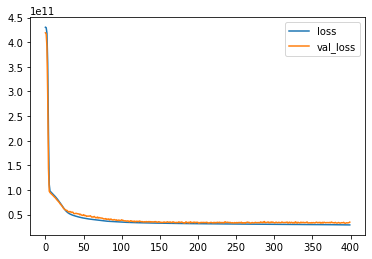

In [80]:
losses.plot()

In [82]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [83]:
predictions = model.predict(X_test)

In [87]:
np.sqrt(mean_squared_error(y_test,predictions))

186632.81704626203

In [88]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [90]:
explained_variance_score(y_test,predictions)

0.7814355690612674

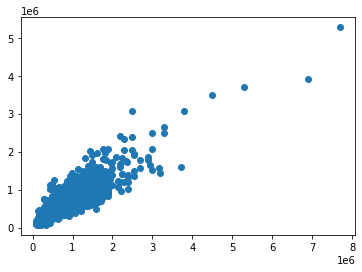

In [91]:
plt.scatter(y_test,predictions)

In [92]:
single_house = df.drop('price',axis = 1).iloc[0]

In [93]:
single_house.values.shape

(19,)

In [95]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [96]:
model.predict(single_house)

array([[233792.92]], dtype=float32)

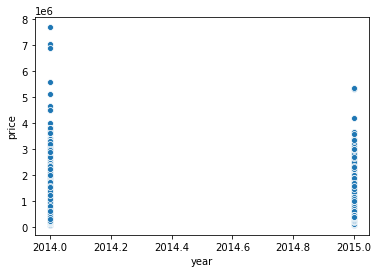

In [100]:
sns.scatterplot(x = 'year',y = 'price',data = df)